# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


***The exercise specified fetching 'precipitation' data but I also pulled data on rain, as rain would be a more accurate metric to deliver on the objective.***

In [3]:
# Step 1: Set Up Parameters

# Location coordinates for London
latitude = 51.5074
longitude = -0.1278

# Date range to 2022
start_date = '2022-01-01'
end_date = '2022-12-31'  # One week of data

# Variables to fetch
hourly_variables = ['precipitation', 'rain']

In [4]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)


In [5]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [6]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,precipitation,rain
0,2022-01-01T00:00,0.0,0.0
1,2022-01-01T01:00,0.0,0.0
2,2022-01-01T02:00,0.0,0.0
3,2022-01-01T03:00,0.0,0.0
4,2022-01-01T04:00,0.0,0.0


In [7]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


precipitation    0
rain             0
dtype: int64

In [8]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_833/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [9]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,precipitation,rain
count,8760.000000,8760.000000
mean,0.075662,0.075491
std,0.404500,0.404418
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,14.700000,14.700000


In [10]:
# Step 6: Resample Data to Weekly Totals

weekly_totals = df.resample('W').sum()
weekly_totals.head()

,precipitation,rain
time,,
2022-01-02,2.2,2.2
2022-01-09,12.9,12.9
2022-01-16,3.1,3.1
2022-01-23,0.0,0.0
2022-01-30,0.1,0.1


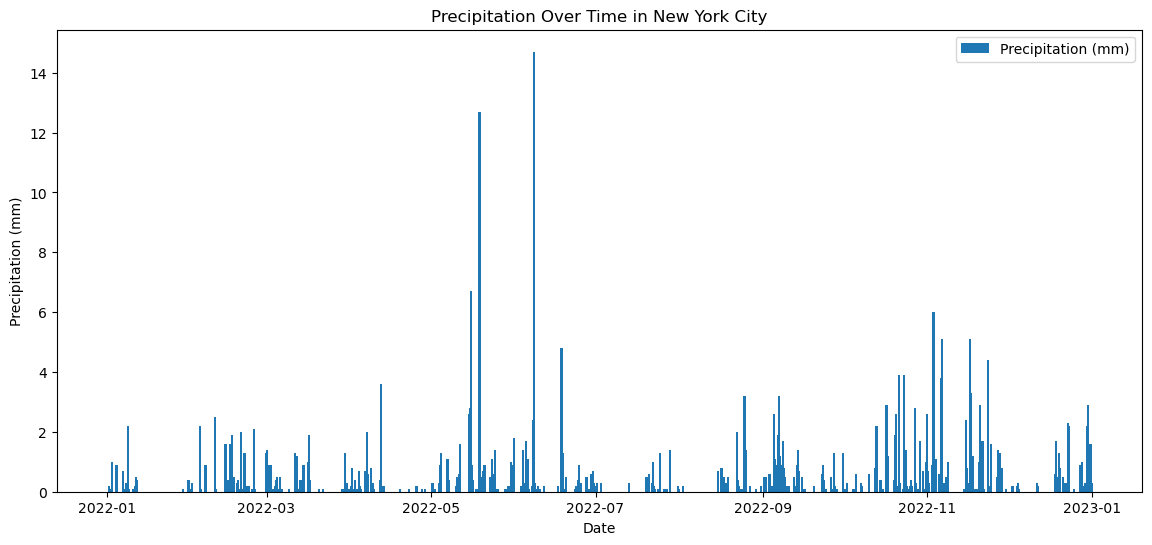

In [11]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [12]:
# Get sum of precipitation and rain to see difference

col_sums = weekly_totals.sum()
print (col_sums)

precipitation    662.8
rain             661.3
dtype: float64


***For London, the difference between precipitation and rain is negligible***

In [13]:
# Step 8: Compare with Another Location - Seatle

# Coordinates for Seatle
latitude_sea = 47.6062
longitude_sea = -122.3321

params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_sea = requests.get(base_url, params=params_sea)

# Load and clean Seatle data
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)

df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
df_sea.fillna(method='ffill', inplace=True)


/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_833/2858686249.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea.fillna(method='ffill', inplace=True)


In [14]:
# Resample Data to Weekly Totals

weekly_totals_sea = df_sea.resample('W').sum()
weekly_totals_sea.head()

,precipitation,rain
time,,
2022-01-02,31.3,9.2
2022-01-09,108.8,90.3
2022-01-16,45.5,45.5
2022-01-23,15.7,15.7
2022-01-30,6.1,6.1


In [15]:
# Get sum of precipitation and rain to see differences for Seatle

col_sums_sea = weekly_totals_sea.sum()
print (col_sums_sea)

precipitation    1131.2
rain             1040.2
dtype: float64


***For Seattle, the difference between precipitation and rain is material***

In [16]:
# Combine column_sums and column_sums_sea for Comparison

combined_sums = pd.concat([col_sums, col_sums_sea], axis=1, keys = ['London','Seattle'])
combined_sums.head()

,London,Seattle
precipitation,662.8,1131.2
rain,661.3,1040.2


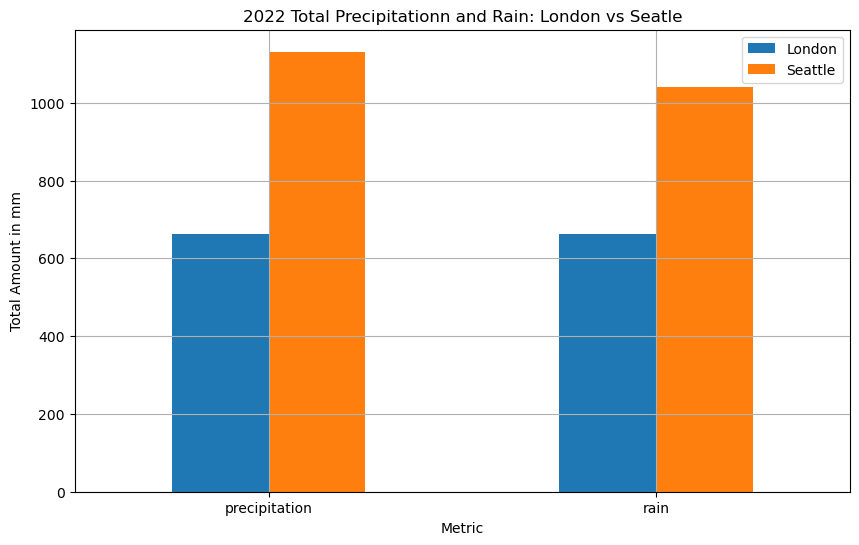

In [17]:
# Plot Commbined Sums to visualize difference in precipitation and rain for the two cities

combined_sums.plot(kind='bar', figsize=(10, 6))
plt.title('2022 Total Precipitationn and Rain: London vs Seatle')
plt.xlabel('Metric')
plt.ylabel('Total Amount in mm')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.show()


In [18]:
# Combine precipitation weekly totals for Comparison
combined_precipitation = pd.DataFrame({
    'London': weekly_totals['precipitation'],
    'Seattle': weekly_totals_sea['precipitation']  
})

combined_precipitation.head()

,London,Seattle
time,,
2022-01-02,2.2,31.3
2022-01-09,12.9,108.8
2022-01-16,3.1,45.5
2022-01-23,0.0,15.7
2022-01-30,0.1,6.1


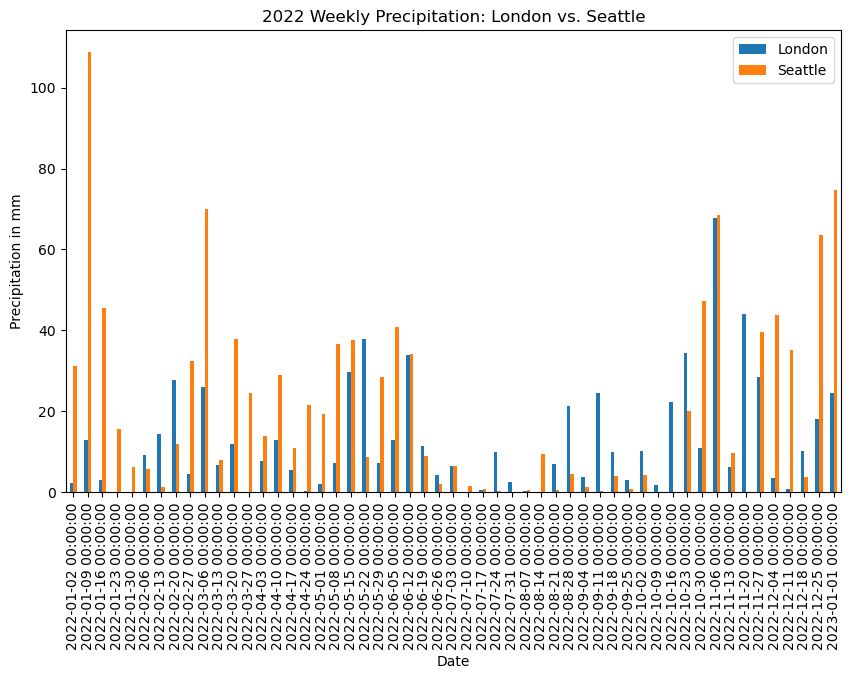

In [19]:
# Plot Comparison of Weekly Precipitation

combined_precipitation.plot(kind='bar', figsize=(10, 6))
plt.title('2022 Weekly Precipitation: London vs. Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation in mm')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()


In [20]:
# Calculate correlation of London and Seatle precipitation
corr_precipitation = combined_precipitation['London'].corr(combined_precipitation['Seattle'])
print(corr_precipitation)

0.3010458544223738


In [21]:
# Combine rainfall weekly totals for Comparison
combined_rain = pd.DataFrame({
    'London': weekly_totals['rain'],
    'Seattle': weekly_totals_sea['rain']  
})

combined_rain.head()


,London,Seattle
time,,
2022-01-02,2.2,9.2
2022-01-09,12.9,90.3
2022-01-16,3.1,45.5
2022-01-23,0.0,15.7
2022-01-30,0.1,6.1


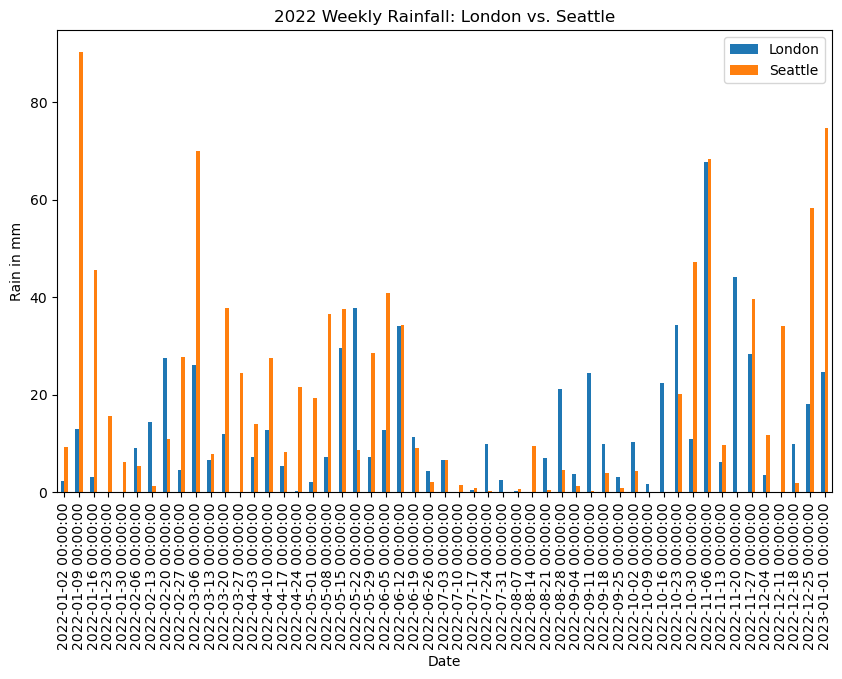

In [22]:
# Plot Comparison of Weekly Rainfall

combined_rain.plot(kind='bar', figsize=(10, 6))
plt.title('2022 Weekly Rainfall: London vs. Seattle')
plt.xlabel('Date')
plt.ylabel('Rain in mm')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()


In [23]:
# Calculate correlation of London and Seatle rain
corr_rain = combined_rain['London'].corr(combined_rain['Seattle'])
print(corr_rain)

0.3551503546933778


In [24]:
# Step 10: Save Data to CSV (Optional)

# Save London Data
df.to_csv('London_Precipitation_Data.csv')

# Save Seattle Data
df_sea.to_csv('Seattle_Precipitation_Data.csv')


# Conclusion
## Seattle had a lot more precipitation and rainfall than London in 2022
Seattle had 1.7X more precipitation than London
Seatle had ~1.6X more rainfall.

## Both cities had a wet spring (mid-May to mid-June 2022)

## During the summer months (July-September 2022), Seattle was relatively dry and had less rainfall/precipitation than London. 